In [10]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE # https://distill.pub/2016/misread-tsne/
import time

In [4]:
cci = np.load('/datax/scratch/benjb/C23_L_non_anom_centroid_idxs.npy', allow_pickle=True)
ccc = np.load('/datax/scratch/benjb/C23_L_non_anom_centroids.npy', allow_pickle=True)

In [15]:
'''counts = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]
times = []

for count in counts:
    print(f'Working on {count}')
    start = time.time()
    iii = np.random.randint(0, len(ccc), count)
    X_embedded = TSNE(n_components=2, 
                      init='random', perplexity=30).fit_transform(ccc[iii])
    end = time.time()
    t = end - start
    times.append(t)'''

Working on 100


Working on 250
Working on 500
Working on 750
Working on 1000
Working on 2500
Working on 5000
Working on 7500
Working on 10000


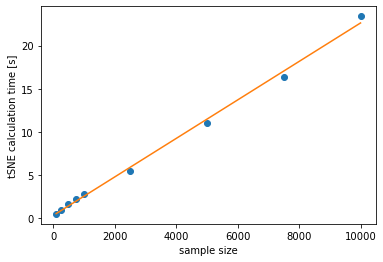

In [17]:
'''import matplotlib.pyplot as plt

z = np.polyfit(counts, times, 1)
p = np.poly1d(z)

#xxx = np.linspace(np.min(counts), np.max(counts), 100)

plt.plot(counts, times, 'o')
plt.plot(counts, p(counts))
#plt.plot(xxx, 10**(p(np.log10(xxx))))
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('sample size')
plt.ylabel('tSNE calculation time [s]')
plt.show()'''

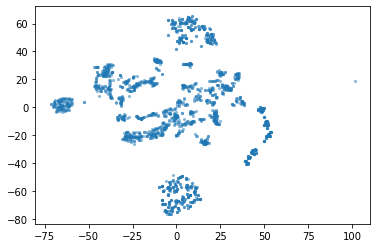

In [23]:
X_embedded = TSNE(n_components=2, 
                  init='random', perplexity=30).fit_transform(ccc)

np.save('/datax/scratch/benjb/C23_L_tSNE_non_anom_centroid_embedding.npy', X_embedded)